### BBCA

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df = pd.read_excel('BBCA.xlsx')
print(df.head())

   Tahun  Total Dividen   EPS  Debt to Equity Ratio  ROA   ROE  Firm Size
0   2023          270.0   395                 4.806  3.6  23.5  14.157757
1   2022          205.0   330                 4.944  3.2  21.7  14.089143
2   2021          145.0   255                 5.055  3.4  18.3  14.021178
3   2020          530.0  1100                 4.823  3.3  16.5  13.888361
4   2019          555.0  1159                 4.385  4.0  18.0  13.731029


### Exploratory Data Analysis (EDA)

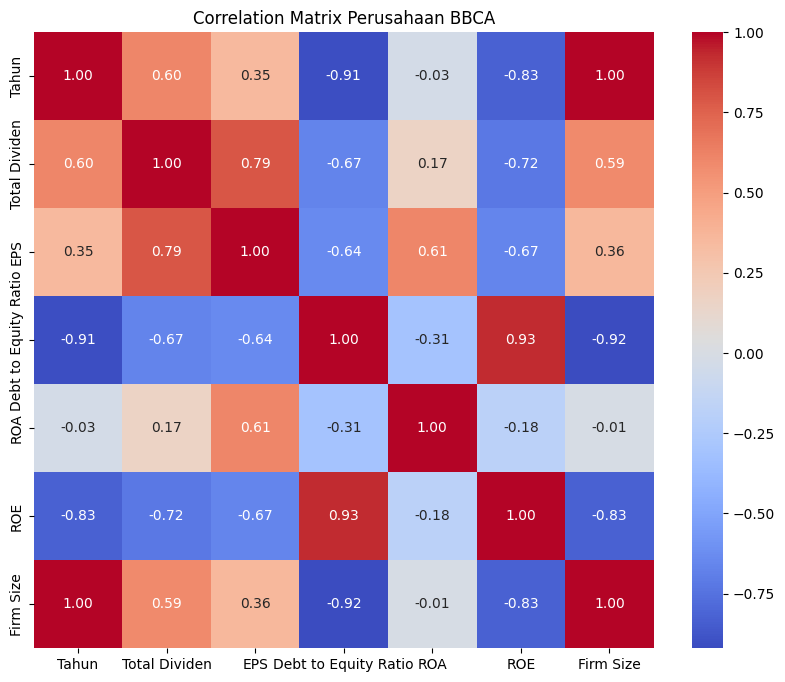

In [3]:
variables = ['Tahun', 'Total Dividen', 'EPS', 'Debt to Equity Ratio', 'ROA', 'ROE', 'Firm Size']

# Correlation Matrix
correlation_matrix = df[variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Perusahaan BBCA')
plt.show()

### Regression Model 1

Model 1:
Intercept (Konstanta): -36641.04999999999
Koefisien (Slope) untuk Tahun: 18.287499999999994

R-squared: 0.36455671839696524


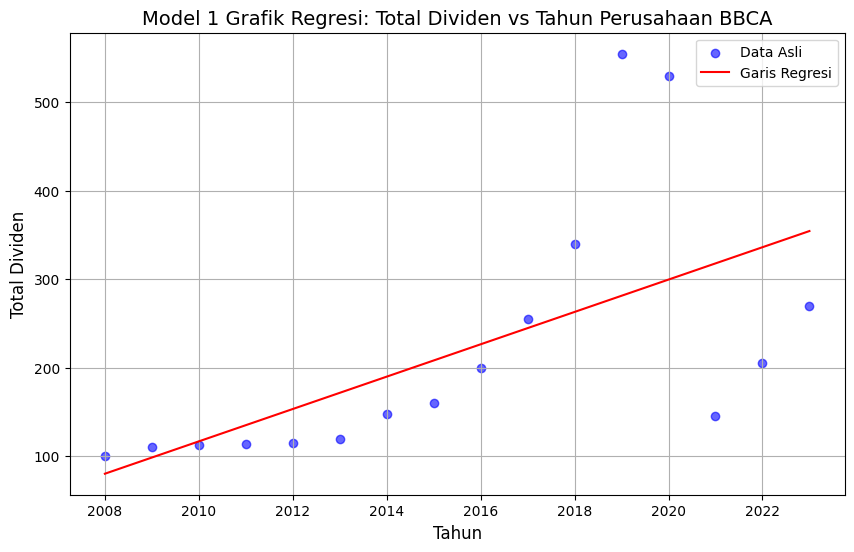

In [4]:
# Definisikan variabel independen dan dependen untuk model pertama
X_1 = df[["Tahun"]]  # Variabel independen
y_1 = df["Total Dividen"]  # Variabel dependen

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Inisialisasi dan latih model regresi linier
model_1 = LinearRegression()
model_1.fit(X_1, y_1)

# Prediksi
y_pred_1 = model_1.predict(X_1)

# Menghitung nilai R-squared
r2_1 = r2_score(y_1, y_pred_1)

# Menampilkan Intersep, Koefisien, dan R-squared
print("Model 1:")
print("Intercept (Konstanta):", model_1.intercept_)
print("Koefisien (Slope) untuk Tahun:", model_1.coef_[0])
print("\nR-squared:", r2_1)

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot antara Tahun dan Total Dividen
plt.scatter(df['Tahun'], df['Total Dividen'], label='Data Asli', color='blue', alpha=0.6)

# Menambahkan garis regresi
plt.plot(df['Tahun'], y_pred_1, color='red', label='Garis Regresi')

# Menambahkan label dan judul
plt.title('Model 1 Grafik Regresi: Total Dividen vs Tahun Perusahaan BBCA', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Dividen', fontsize=12)

# Menambahkan legend
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menampilkan plot
plt.show()

## Regression Model 2

Model 2:
Intercept (Konstanta): -22635.716254879502
Koefisien (Slope) untuk Tahun: 11.247232853197842
Koefisien (Slope) untuk EPS: 0.2998673134873453

R-squared: 0.7514557079130098


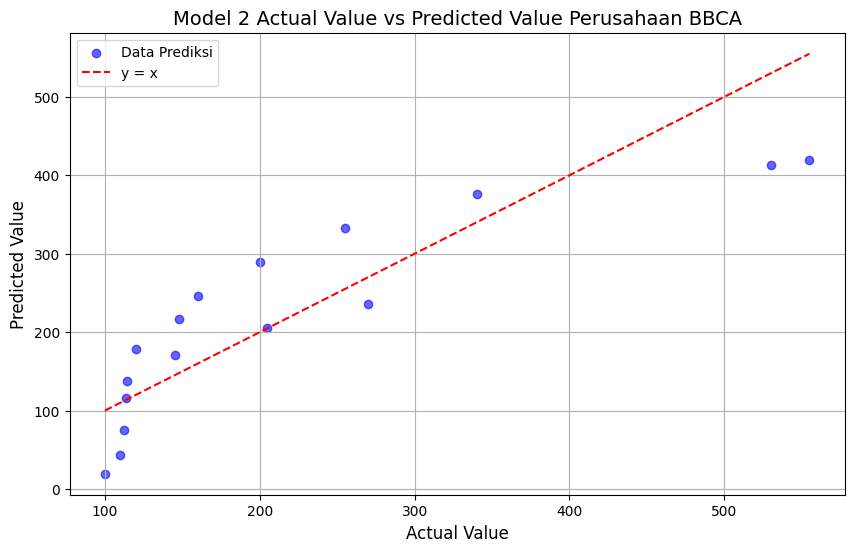

,Actual Value,Predicted Value,Difference
0,270.0,235.883396,34.116604
1,205.0,205.144788,-0.144788
2,145.0,171.407506,-26.407506
3,530.0,413.548153,116.451847
4,555.0,419.993092,135.006908
5,340.0,375.760455,-35.760455
6,255.0,333.327021,-78.327021
7,200.0,289.394251,-89.394251
8,160.0,246.660950,-86.660950
9,148.0,216.821944,-68.821944


In [5]:
# Definisikan variabel independen dan dependen untuk model kedua
X_2 = df[["Tahun", "EPS"]]  # Variabel independen
y_2 = df["Total Dividen"]  # Variabel dependen

# Inisialisasi dan latih model regresi linier
model_2 = LinearRegression()
model_2.fit(X_2, y_2)

# Prediksi
y_pred_2 = model_2.predict(X_2)

# Menghitung nilai R-squared
r2_2 = r2_score(y_2, y_pred_2)

# Menampilkan Intersep, Koefisien, dan R-squared
print("Model 2:")
print("Intercept (Konstanta):", model_2.intercept_)
for var, coef in zip(X_2.columns, model_2.coef_):
    print(f"Koefisien (Slope) untuk {var}: {coef}")
print("\nR-squared:", r2_2)

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot antara Actual Value dan Predicted Value
plt.scatter(y_2, y_pred_2, label='Data Prediksi', color='blue', alpha=0.6)

# Menambahkan garis y=x (diagonal) untuk referensi
plt.plot([y_2.min(), y_2.max()], [y_2.min(), y_2.max()], linestyle='--', color='red', label='y = x')

# Menambahkan label dan judul
plt.title('Model 2 Actual Value vs Predicted Value Perusahaan BBCA', fontsize=14)
plt.xlabel('Actual Value', fontsize=12)
plt.ylabel('Predicted Value', fontsize=12)

# Menambahkan legend
plt.legend()

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()

# Menggunakan model untuk membuat prediksi pada data uji
y_pred_2 = model_2.predict(X_2)

# Membuat DataFrame dengan nilai aktual, prediksi, dan selisih
pred_y_df = pd.DataFrame({'Actual Value': y_2, 'Predicted Value': y_pred_2, 'Difference': y_2 - y_pred_2})

# Menampilkan DataFrame
pred_y_df

### Regression Model 3

Model 3:
Intercept (Konstanta): -188849.79514019724
Koefisien (Slope) untuk Tahun: 95.70255840060167
Koefisien (Slope) untuk EPS: 0.5851675599955519
Koefisien (Slope) untuk Debt to Equity Ratio: 156.68602516859283
Koefisien (Slope) untuk ROE: -6.409840802526828
Koefisien (Slope) untuk Firm Size: -375.0853357909016

R-squared: 0.960820671632778


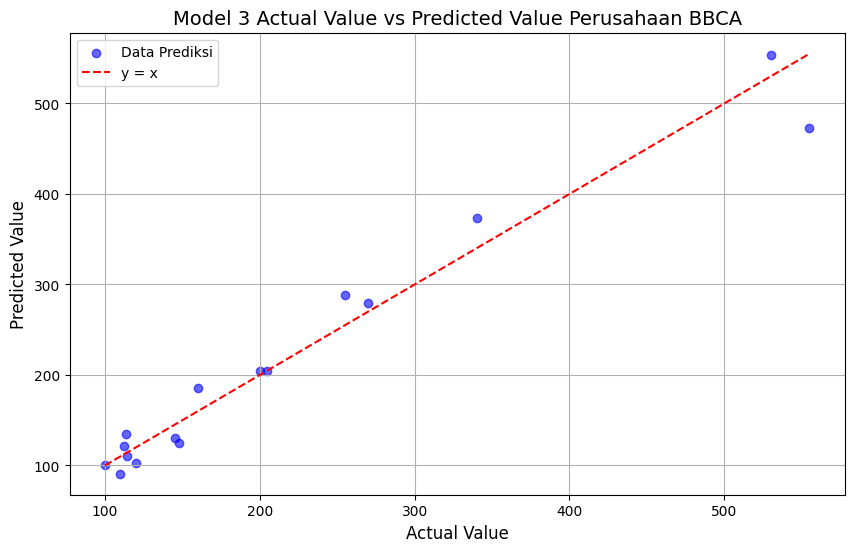

,Actual Value,Predicted Value,Difference
0,270.0,279.656502,-9.656502
1,205.0,204.814320,0.185680
2,145.0,129.902518,15.097482
3,530.0,553.670805,-23.670805
4,555.0,473.262773,81.737227
5,340.0,373.228259,-33.228259
6,255.0,288.925581,-33.925581
7,200.0,204.006523,-4.006523
8,160.0,185.121155,-25.121155
9,148.0,125.047404,22.952596


In [6]:
# Definisikan variabel independen dan dependen untuk model kedua
X_3 = df[["Tahun", "EPS", "Debt to Equity Ratio", "ROE", "Firm Size"]]  # Variabel independen
y_3 = df["Total Dividen"]  # Variabel dependen

# Inisialisasi dan latih model regresi linier
model_3 = LinearRegression()
model_3.fit(X_3, y_3)

# Prediksi
y_pred_3 = model_3.predict(X_3)

# Menghitung nilai R-squared
r2_3 = r2_score(y_3, y_pred_3)

# Menampilkan Intersep, Koefisien, dan R-squared
print("Model 3:")
print("Intercept (Konstanta):", model_3.intercept_)
for var, coef in zip(X_3.columns, model_3.coef_):
    print(f"Koefisien (Slope) untuk {var}: {coef}")
print("\nR-squared:", r2_3)

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot antara Actual Value dan Predicted Value
plt.scatter(y_3, y_pred_3, label='Data Prediksi', color='blue', alpha=0.6)

# Menambahkan garis y=x (diagonal) untuk referensi
plt.plot([y_3.min(), y_3.max()], [y_3.min(), y_3.max()], linestyle='--', color='red', label='y = x')

# Menambahkan label dan judul
plt.title('Model 3 Actual Value vs Predicted Value Perusahaan BBCA', fontsize=14)
plt.xlabel('Actual Value', fontsize=12)
plt.ylabel('Predicted Value', fontsize=12)

# Menambahkan legend
plt.legend()

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()

# Menggunakan model untuk membuat prediksi pada data uji
y_pred_3 = model_3.predict(X_3)

# Membuat DataFrame dengan nilai aktual, prediksi, dan selisih
pred_y_df = pd.DataFrame({'Actual Value': y_3, 'Predicted Value': y_pred_3, 'Difference': y_3 - y_pred_3})

# Menampilkan DataFrame
pred_y_df